In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chisquare
from scipy.stats import chi2

# 뽑기 특징: 
- 몇번을 뽑던간에 전에 뽑았던게 다음 뽑기에 영향을 미치지 안습니다.
- 예를들자면 99번 못뽑았으니까 다음 뽑기는 뽑힐것이다 라고 생각하면 안댑니다.

# 우선 확률이 1%인 뽑기를 1,000번 돌려보도록 하겠습니다.

In [8]:
num = 0
for i in range(1000):
    if np.random.uniform() <= 0.01:
        num += 1
        
print('갓챠를 1000번 돌려서 {}개의 레어 아이템을 뽑았습니다'.format(num))

갓챠를 1000번 돌려서 17개의 레어 아이템을 뽑았습니다


# 확률이 1%인 뽑기를 1,000번 돌려서 몇번이 나오는지를 또 1,000번 기록하여 그 분포를 보도록 하여 보겠습니다.

In [9]:
k = []
for _ in range(1000):
    num = 0
    for _ in range(1000):
        if np.random.uniform() <= 0.01:
            num += 1
    k.append(num)

In [10]:
np.mean(k)

9.864

<BarContainer object of 30 artists>

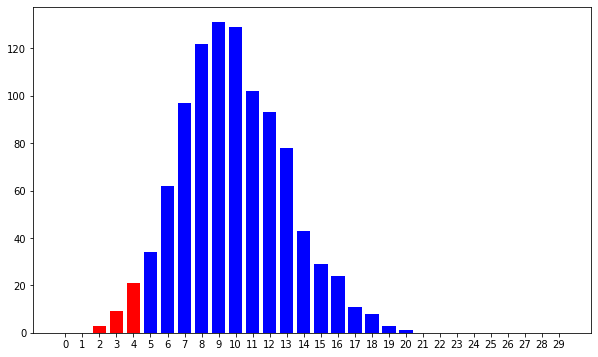

In [11]:

l = dict(zip(list(range(30)),[0]*30))
for i in k:
    if i in l:
        l[i] += 1
        
l
plt.figure(figsize = (10,6))
plt.xticks(list(range(30)))
# plt.hist(k, bins = 10)
plt.bar(l.keys(), l.values(), color = ['red']*5 + ['blue'] * 25)

In [12]:
# 이 분포에서 4개 이하가 뽑혔을때의 사후확률을 구해보겠습니다.
total = 0
for i in range(5):
    total += l[i]
total/1000

0.033

((array([-3.19758950e+00, -2.93237785e+00, -2.78437841e+00, -2.67999560e+00,
         -2.59855946e+00, -2.53139899e+00, -2.47402263e+00, -2.42379214e+00,
         -2.37902149e+00, -2.33856546e+00, -2.30160949e+00, -2.26755284e+00,
         -2.23593934e+00, -2.20641415e+00, -2.17869564e+00, -2.15255643e+00,
         -2.12781017e+00, -2.10430217e+00, -2.08190261e+00, -2.06050135e+00,
         -2.04000420e+00, -2.02032992e+00, -2.00140792e+00, -1.98317650e+00,
         -1.96558137e+00, -1.94857451e+00, -1.93211325e+00, -1.91615948e+00,
         -1.90067901e+00, -1.88564107e+00, -1.87101783e+00, -1.85678408e+00,
         -1.84291686e+00, -1.82939524e+00, -1.81620005e+00, -1.80331371e+00,
         -1.79072004e+00, -1.77840415e+00, -1.76635224e+00, -1.75455157e+00,
         -1.74299028e+00, -1.73165738e+00, -1.72054262e+00, -1.70963644e+00,
         -1.69892989e+00, -1.68841463e+00, -1.67808281e+00, -1.66792707e+00,
         -1.65794051e+00, -1.64811661e+00, -1.63844924e+00, -1.62893261e+00,

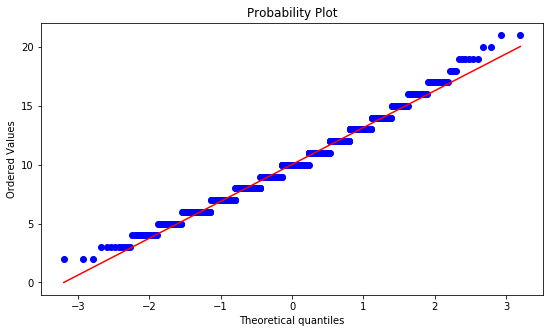

In [268]:
plt.figure(figsize = (9,5))
stats.probplot(k, dist=stats.norm, plot = plt)

# 이항분포
이항분포가 무엇이냐
https://ko.wikipedia.org/wiki/%EC%9D%B4%ED%95%AD_%EB%B6%84%ED%8F%AC#:~:text=%EC%9D%B4%ED%95%AD%20%EB%B6%84%ED%8F%AC(%E4%BA%8C%E9%A0%85%E5%88%86%E5%B8%83,%EC%8B%9C%ED%96%89%EC%9D%B4%EB%9D%BC%EA%B3%A0%20%EB%B6%88%EB%A6%AC%EA%B8%B0%EB%8F%84%20%ED%95%9C%EB%8B%A4.

In [271]:
def c(x,n):
    u = 1
    for i in range(x - n +1, x+1):
        u *= i
    d = 1
    for i in range(1, n+1):
        d *= i
    return u/d

def binomial(p,n):
    k = []
    for i in range(n+1):
        k.append(c(n,i)*p**i * (1-p)**(n-i))
    return k

p = 0.01
n = 1000


k = binomial(p,n)
sum(k)

0.9999999999999915

([<matplotlib.axis.XTick at 0x109eda90>,
 <a list of 30 Text xticklabel objects>)

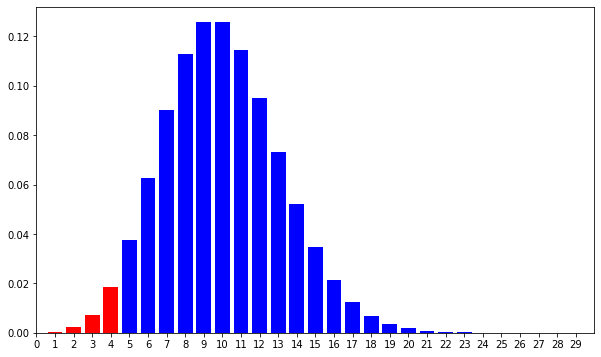

In [280]:
plt.figure(figsize = (10,6))
plt.bar(list(range(n+1)),k,color = ['red']*5 + ['blue'] * 25)
plt.xlim(0,30)
plt.xticks(list(range(30)))

In [282]:
sum(k[:5])

0.02868639999900447

In [ ]:
!jupyter nbconvert binomial.ipynb --to slides --post serve

(0, 20)

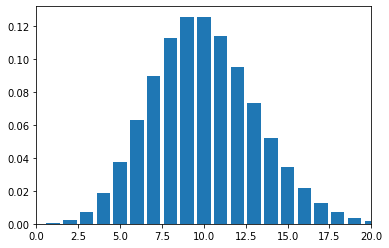

In [171]:
sum(binomial(0.01,1000)[:10])
plt.bar(list(range(1000+1)),binomial(0.01,1000))
plt.xlim(0,20)

In [4]:
0.6 + 0.6*0.4 + 0.4 * 0.6 * 0.4 + 0.4 **3

1.0